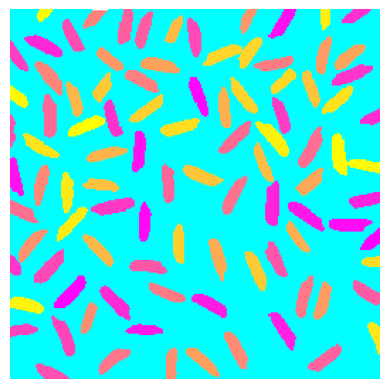

In [1]:
from tool import *

# 读取图像（第二个参数0表示以灰度图像方式读取图像）
img = imread("1_counting_objects_rgb.png")

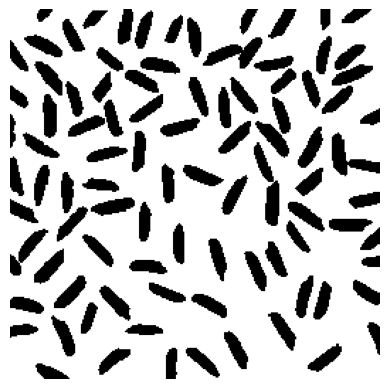

In [2]:
img = im_replace(img, (0, 255, 255), (255, 255, 255))
img = im_replace(img, (255, 255, 255), (0, 0, 0), not_equal=True)

In [3]:
def calcNumObjects(img, neighbour=4):
    # 初始化并查集
    ufs = UnionFind()
    # 将三通道 BGR 转成单通道
    img = img[:, :, 0]
    # 获取图像的尺寸
    M, N = img.shape
    I = np.where(img == 0, -1, 0)

    label = 0

    # 第一遍
    for i in range(M):
        for j in range(N):
            # 如果该点为黑
            if I[i, j] == -1:
                # print(f"I[{i}, {j}] = {I[i,j]}")

                # 超出边界则返回默认值（0）
                a = ndarr_2dim_val(I, i, j - 1)  # 左
                b = ndarr_2dim_val(I, i - 1, j)  # 上
                c = ndarr_2dim_val(I, i - 1, j - 1)  # 左上
                d = ndarr_2dim_val(I, i - 1, j + 1)  # 右上

                if neighbour == 4:
                    # 如果上述值中有标记值，则将标记值赋给该点
                    val = a or b  # 只关注左和上
                    if val == -1:
                        print(a, b, i, j)
                    valLst = [val for val in (a, b) if val > 0]

                elif neighbour == 8:
                    # 如果上述值中有标记值，则将标记值赋给该点
                    val = a or b or c or d
                    if val == -1:
                        print(a, b, c, d)
                    valLst = [val for val in (a, b, c, d) if val > 0]

                # 若周边无标记值，则使用新标记值
                if val == 0:
                    label += 1
                    I[i, j] = label
                    # print(f"I[{i}, {j}] = {label}")
                    ufs.add(label)

                # 被周边的元素赋予了标记值
                elif val != 0:
                    I[i, j] = val
                    # print(f"I[{i}, {j}] = {val}")
                    # 对可能的周边多标记值进行合并
                    if len(valLst) >= 2:
                        # ！k 变量名冲突导致严重 bug
                        for k in range(len(valLst) - 1):
                            if valLst[k] == -1 or valLst[k + 1] == -1:
                                print(valLst)
                            ufs.merge(valLst[k], valLst[k + 1])

    # 第二遍
    for i in range(M):
        for j in range(N):
            # 如果该点有标记值
            if I[i, j] > 0:
                I[i, j] = ufs.find(I[i, j])

    return len(set(ufs.parent.values()))


# 由于 MATLAB 自动计算阈值会误忽略大量 Objects，故本程序手动进行二值化根据 Row-by-row 算法并准确计算 Object 数量
print("Number of objects (4-neighbours):", calcNumObjects(img, neighbour=4))
print("Number of objects (8-neighbours):", calcNumObjects(img, neighbour=8))

Number of objects (4-neighbours): 95
Number of objects (8-neighbours): 93
Number of objects (8-neighbours): 93
